# AR(1) Process Simulation

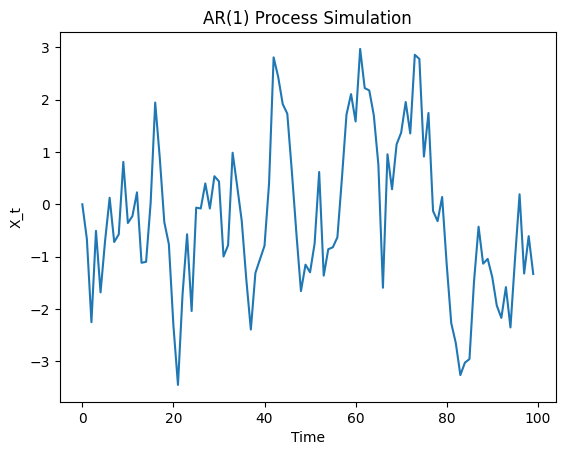

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
phi = 0.8
mu = 0
sigma = 1
n = 100

# Generate white noise
epsilon = np.random.normal(0, sigma, n)

# Initialize the series
X = np.zeros(n)

# Simulate the AR(1) process
for t in range(1, n):
    X[t] = mu + phi * X[t-1] + epsilon[t]

# Plot the series
plt.plot(X)
plt.title('AR(1) Process Simulation')
plt.xlabel('Time')
plt.ylabel('X_t')
plt.show()
